# Data Cleaning Basics

**Importing Libraries and Dataset:**

In [1]:
import pandas as pd  # Importing pandas for data manipulation and analysis
from scipy import stats  # Importing the stats module from SciPy for statistical functions
import itertools  # Importing itertools for creating iterators for efficient looping

# Importing specific statistical tests from SciPy
from scipy.stats import normaltest  # For performing D'Agostino's K^2 test for normality
from scipy.stats import anderson  # For performing the Anderson-Darling test for normality
from scipy.stats import shapiro  # For performing the Shapiro-Wilk test for normality

import plotly.express as px  # Importing Plotly Express for creating interactive plots
import matplotlib.pyplot as plt  # Importing Matplotlib for creating static plots
import statsmodels.api as sm  # Importing StatsModels for statistical modeling and hypothesis testing
import numpy as np  # Importing NumPy for numerical operations and handling arrays
import seaborn as sns  # Importing Seaborn for enhanced statistical data visualization

In [2]:
df = pd.read_excel("Customer Call List.xlsx")

In [3]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


**Inspect the Data**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         21 non-null     int64 
 1   First_Name         21 non-null     object
 2   Last_Name          20 non-null     object
 3   Phone_Number       19 non-null     object
 4   Address            21 non-null     object
 5   Paying Customer    21 non-null     object
 6   Do_Not_Contact     17 non-null     object
 7   Not_Useful_Column  21 non-null     bool  
dtypes: bool(1), int64(1), object(6)
memory usage: 1.3+ KB


In [5]:
df.head(21)

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


In [6]:
df.columns

Index(['CustomerID', 'First_Name', 'Last_Name', 'Phone_Number', 'Address',
       'Paying Customer', 'Do_Not_Contact', 'Not_Useful_Column'],
      dtype='object')

In [16]:
df.describe()

,CustomerID
count,20.00000
mean,1010.50000
std,5.91608
min,1001.00000
25%,1005.75000
50%,1010.50000
75%,1015.25000
max,1020.00000


**Check and remove for duplicates**

In [12]:
df.duplicated() # Checking for duplicates

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20     True
dtype: bool

There is a one duplicate value for customer ID 1020

In [13]:
df = df.drop_duplicates() # Removing duplicates
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Not_Useful_Column
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No,True
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes,False
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN,True
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,True
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No,True
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes,True
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,False
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No,False
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN,False
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No,True


**Correcting Errors**

Removing unnecessary columns

"Not_Useful_Column" column is unnecessary for the analysis

In [17]:
df = df.drop(columns = "Not_Useful_Column")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,/White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


Incorrect format in Last_Name column

In [18]:
#df['Last_Name'].str.lstrip("/") # using lstrip to remove incorrect value from left side 
#df['Last_Name'].str.lstrip("...")
#df['Last_Name'].str.rstrip("_")# using rstrip to remove incorrect value from right side 
df['Last_Name'] = df['Last_Name'].str.strip("1234567890._/") # using strip to remove incorrect values from both side
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,123-545-5421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,123/643/9775,93 West Main Street,No,Yes
2,1003,Walter,White,7066950392,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,123-543-2345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,876|678|3469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,304-762-2467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,876|678|3469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,N/a,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,123-545-5421,"25th Main Street, New York",Yes,No


Incorrect format in Phone_number column

In [19]:
df['Phone_Number'] = df['Phone_Number'].str.replace("[^a-zA-Z0-9]","") # removing any character expect numbers and letters

df['Phone_Number'].apply(lambda x: str(x)[0:3] + '-' + str(x)[3:6] + '-' + str(x)[6:10]) # making a standard format

C:\Users\VENKAT\AppData\Local\Temp\ipykernel_17892\380110851.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Phone_Number'] = df['Phone_Number'].str.replace("[^a-zA-Z0-9]","") # removing any character expect numbers and letters


0     123-545-5421
1     123-643-9775
2            nan--
3     123-543-2345
4     876-678-3469
5     304-762-2467
6            nan--
7     876-678-3469
8             Na--
9     123-545-5421
10           nan--
11           nan--
12    123-543-2345
13    876-678-3469
14    304-762-2467
15    123-545-5421
16    123-643-9775
17           nan--
18            Na--
19    876-678-3469
Name: Phone_Number, dtype: object

In [20]:
df['Phone_Number'] = df['Phone_Number'].str.replace("nan--","") #correcting NaN values
df['Phone_Number'] = df['Phone_Number'].str.replace("Na--","")

In [23]:
df['Phone_Number']

0     1235455421
1     1236439775
2            NaN
3     1235432345
4     8766783469
5     3047622467
6            NaN
7     8766783469
8             Na
9     1235455421
10           NaN
11           NaN
12    1235432345
13    8766783469
14    3047622467
15    1235455421
16    1236439775
17           NaN
18            Na
19    8766783469
Name: Phone_Number, dtype: object

In [22]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact
0,1001,Frodo,Baggins,1235455421,"123 Shire Lane, Shire",Yes,No
1,1002,Abed,Nadir,1236439775,93 West Main Street,No,Yes
2,1003,Walter,White,NaN,298 Drugs Driveway,N,NaN
3,1004,Dwight,Schrute,1235432345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,No
5,1006,Ron,Swanson,3047622467,768 City Parkway,Yes,Yes
6,1007,Jeff,Winger,NaN,1209 South Street,No,No
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,No
8,1009,Gandalf,NaN,Na,123 Middle Earth,Yes,NaN
9,1010,Peter,Parker,1235455421,"25th Main Street, New York",Yes,No


Standardize Address column

In [24]:
df[["Street_address","City","Zip_code"]] = df['Address'].str.split(",",2,expand= True) # splitting the column based on comma
df

,CustomerID,First_Name,Last_Name,Phone_Number,Address,Paying Customer,Do_Not_Contact,Street_address,City,Zip_code
0,1001,Frodo,Baggins,1235455421,"123 Shire Lane, Shire",Yes,No,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,1236439775,93 West Main Street,No,Yes,93 West Main Street,None,None
2,1003,Walter,White,NaN,298 Drugs Driveway,N,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,1235432345,"980 Paper Avenue, Pennsylvania, 18503",Yes,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,8766783469,123 Dragons Road,Y,No,123 Dragons Road,None,None
5,1006,Ron,Swanson,3047622467,768 City Parkway,Yes,Yes,768 City Parkway,None,None
6,1007,Jeff,Winger,NaN,1209 South Street,No,No,1209 South Street,None,None
7,1008,Sherlock,Holmes,8766783469,98 Clue Drive,N,No,98 Clue Drive,None,None
8,1009,Gandalf,NaN,Na,123 Middle Earth,Yes,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,1235455421,"25th Main Street, New York",Yes,No,25th Main Street,New York,None


In [25]:
df = df.drop(columns = "Address")

In [26]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Paying Customer,Do_Not_Contact,Street_address,City,Zip_code
0,1001,Frodo,Baggins,1235455421,Yes,No,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,1236439775,No,Yes,93 West Main Street,None,None
2,1003,Walter,White,NaN,N,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,1235432345,Yes,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,8766783469,Y,No,123 Dragons Road,None,None
5,1006,Ron,Swanson,3047622467,Yes,Yes,768 City Parkway,None,None
6,1007,Jeff,Winger,NaN,No,No,1209 South Street,None,None
7,1008,Sherlock,Holmes,8766783469,N,No,98 Clue Drive,None,None
8,1009,Gandalf,NaN,Na,Yes,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,1235455421,Yes,No,25th Main Street,New York,None


Standardize Paying Customer column

In [27]:
df["Paying Customer"] = df["Paying Customer"].str.replace("Yes","Y")
df["Paying Customer"] = df["Paying Customer"].str.replace("No","N")

In [30]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Paying Customer,Do_Not_Contact,Street_address,City,Zip_code
0,1001,Frodo,Baggins,1235455421,Y,No,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,1236439775,N,Yes,93 West Main Street,None,None
2,1003,Walter,White,NaN,N,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,1235432345,Y,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,8766783469,Y,No,123 Dragons Road,None,None
5,1006,Ron,Swanson,3047622467,Y,Yes,768 City Parkway,None,None
6,1007,Jeff,Winger,NaN,N,No,1209 South Street,None,None
7,1008,Sherlock,Holmes,8766783469,N,No,98 Clue Drive,None,None
8,1009,Gandalf,NaN,Na,Y,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,1235455421,Y,No,25th Main Street,New York,None


Standardize Do_Not_Contact Column

In [31]:
df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace("Yes","Y")
df["Do_Not_Contact"] = df["Do_Not_Contact"].str.replace("No","N")
df

,CustomerID,First_Name,Last_Name,Phone_Number,Paying Customer,Do_Not_Contact,Street_address,City,Zip_code
0,1001,Frodo,Baggins,1235455421,Y,N,123 Shire Lane,Shire,None
1,1002,Abed,Nadir,1236439775,N,Y,93 West Main Street,None,None
2,1003,Walter,White,NaN,N,NaN,298 Drugs Driveway,None,None
3,1004,Dwight,Schrute,1235432345,Y,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,8766783469,Y,N,123 Dragons Road,None,None
5,1006,Ron,Swanson,3047622467,Y,Y,768 City Parkway,None,None
6,1007,Jeff,Winger,NaN,N,N,1209 South Street,None,None
7,1008,Sherlock,Holmes,8766783469,N,N,98 Clue Drive,None,None
8,1009,Gandalf,NaN,Na,Y,NaN,123 Middle Earth,None,None
9,1010,Peter,Parker,1235455421,Y,N,25th Main Street,New York,None


**Handling the Missing Data**

In [32]:
df.isna().sum() # checking for null values count

CustomerID          0
First_Name          0
Last_Name           1
Phone_Number        5
Paying Customer     0
Do_Not_Contact      4
Street_address      0
City               14
Zip_code           19
dtype: int64

In [33]:
df = df.replace("Na",' ')
df = df.replace("N/a",' ')

In [34]:
df = df.fillna(" ")

In [35]:
df

,CustomerID,First_Name,Last_Name,Phone_Number,Paying Customer,Do_Not_Contact,Street_address,City,Zip_code
0,1001,Frodo,Baggins,1235455421,Y,N,123 Shire Lane,Shire,
1,1002,Abed,Nadir,1236439775,N,Y,93 West Main Street,,
2,1003,Walter,White,,N,,298 Drugs Driveway,,
3,1004,Dwight,Schrute,1235432345,Y,Y,980 Paper Avenue,Pennsylvania,18503
4,1005,Jon,Snow,8766783469,Y,N,123 Dragons Road,,
5,1006,Ron,Swanson,3047622467,Y,Y,768 City Parkway,,
6,1007,Jeff,Winger,,N,N,1209 South Street,,
7,1008,Sherlock,Holmes,8766783469,N,N,98 Clue Drive,,
8,1009,Gandalf,,,Y,,123 Middle Earth,,
9,1010,Peter,Parker,1235455421,Y,N,25th Main Street,New York,


In [37]:
df.isna().sum()

CustomerID         0
First_Name         0
Last_Name          0
Phone_Number       0
Paying Customer    0
Do_Not_Contact     0
Street_address     0
City               0
Zip_code           0
dtype: int64

**Handling Outliers**

In [38]:
import seaborn as sns

# Load the diamonds dataset
df = sns.load_dataset('diamonds')

In [39]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [40]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [41]:
df.duplicated().sum()

146

In [42]:
df = df.drop_duplicates()

In [43]:
df.duplicated().sum()

0

In [44]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Check if the data is normally distributed to choose which method to check outliers**

In [ ]:
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

Checking using Visual graphs

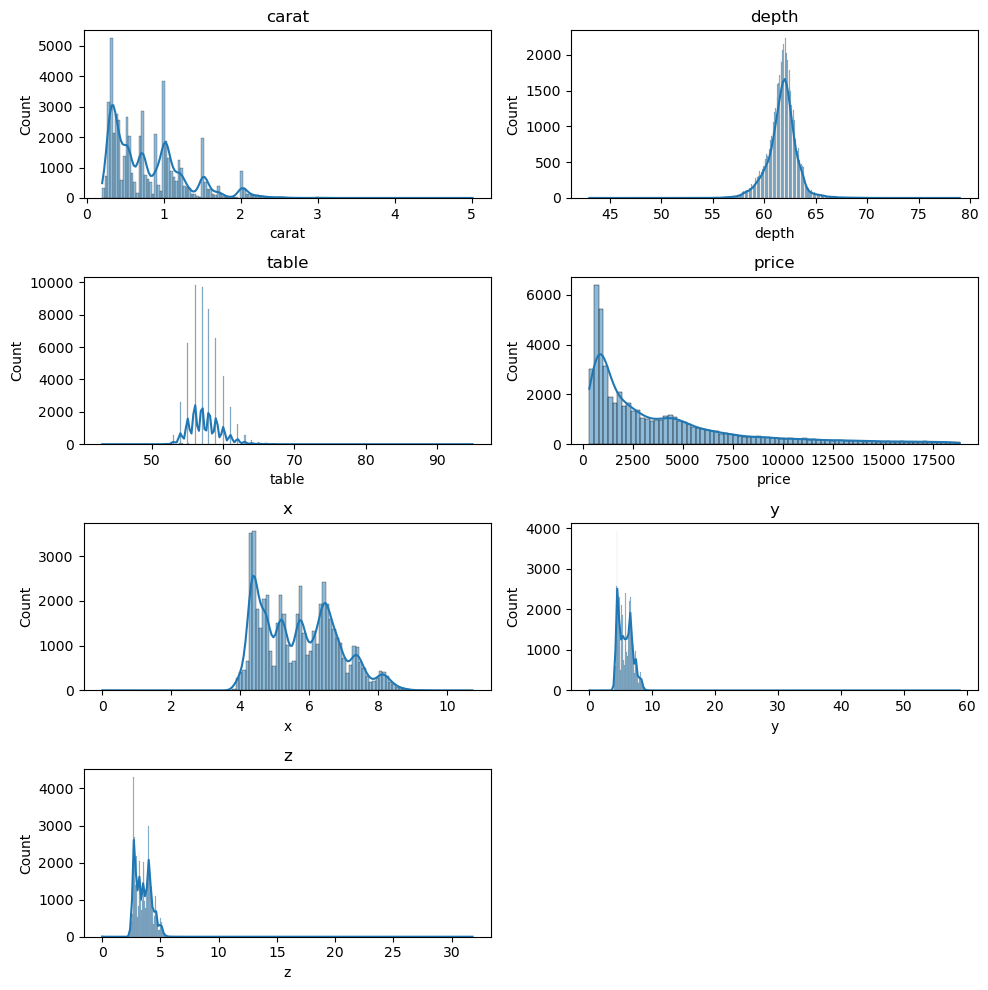

In [45]:
def find_hist_nor(df):
    columns = df.select_dtypes(include = np.number).columns
    fig, ax = plt.subplots(4, 2, figsize=(10, 10))
    for i, col in enumerate(columns):
        row, col_num = divmod(i, 2)  # Determine row and column index for the subplot
        sns.histplot(df[col],kde = True, bins = 'auto',ax = ax[row, col_num])  # Plot histogram
        ax[row, col_num].set_title(col)  # Set title
    fig.delaxes(ax[3, 1])
    fig.tight_layout()
    plt.show()
    
    
find_hist_nor(df)
    
    

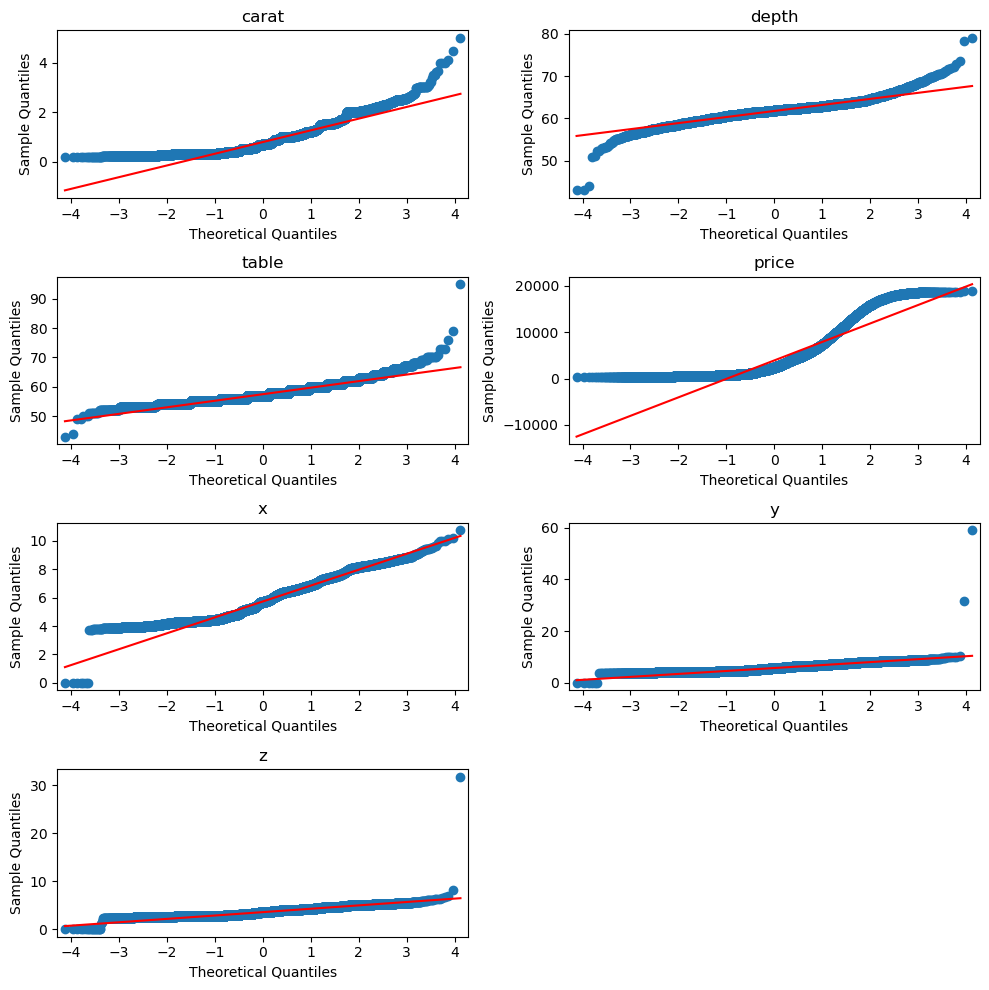

In [46]:

def find_qq_nor(df):
    columns = df.select_dtypes(include = np.number).columns
    fig, ax = plt.subplots(4, 2, figsize=(10, 10))
    for i, col in enumerate(columns):
        row, col_num = divmod(i, 2)  # Determine row and column index for the subplot
        sm.qqplot(df[col],line = 's', ax= ax[row, col_num] ) # Plot histogram
        ax[row, col_num].set_title(col)  # Set title
    fig.delaxes(ax[3, 1])
    fig.tight_layout()
    plt.show()

find_qq_nor(df)

Check using statistical test
1. Shapio- wilk test

The null hypothesis (H0) is that the data is normally distributed. If the p-value is less than 0.05, you reject the null hypothesis, meaning the data is not normally distributed.

In [47]:
from scipy.stats import shapiro

In [48]:
def shapiro_test(df):
    for i in df.select_dtypes(include = np.number).columns:
        stat , p = shapiro(df[i])
        print('Column name:',i)
        print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p}")
        if p > 0.05:
            print("Data looks normally distributed")
        else:
            print("Data does not look normally distributed")
        print('\n')
        

shapiro_test(df)

Column name: carat
Shapiro-Wilk Test Statistic: 0.8942246437072754, p-value: 0.0
Data does not look normally distributed


Column name: depth
Shapiro-Wilk Test Statistic: 0.9545227885246277, p-value: 0.0
Data does not look normally distributed


Column name: table
Shapiro-Wilk Test Statistic: 0.9548292756080627, p-value: 0.0
Data does not look normally distributed


Column name: price
Shapiro-Wilk Test Statistic: 0.7982577085494995, p-value: 0.0
Data does not look normally distributed


Column name: x
Shapiro-Wilk Test Statistic: 0.9566535353660583, p-value: 0.0
Data does not look normally distributed


Column name: y
Shapiro-Wilk Test Statistic: 0.9185580611228943, p-value: 0.0
Data does not look normally distributed


Column name: z
Shapiro-Wilk Test Statistic: 0.9338191747665405, p-value: 0.0
Data does not look normally distributed




D:\anaconda\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


2. Anderson-Darling test

The Anderson-Darling test is another test for checking the normality of data. It provides a statistic and critical values. If the statistic is larger than the critical value, the data is not normally distributed.


In [49]:
from scipy.stats import anderson

In [50]:
def Anderson_test(df):
    for col in df.select_dtypes(include = np.number).columns:
        result = anderson(df[col], dist='norm')
        print('Column name:',col)
        print('Anderson-Darling Test Statistic: %.3f' % result.statistic)
        for i in range(len(result.critical_values)):
            sl, cv = result.significance_level[i], result.critical_values[i]
            if result.statistic > cv:
                print(f"At {sl}% significance level: Data is not normally distributed")
            else:
                print(f"At {sl}% significance level: Data is normally distributed")
        print('\n')   
        

Anderson_test(df)

Column name: carat
Anderson-Darling Test Statistic: 1519.367
At 15.0% significance level: Data is not normally distributed
At 10.0% significance level: Data is not normally distributed
At 5.0% significance level: Data is not normally distributed
At 2.5% significance level: Data is not normally distributed
At 1.0% significance level: Data is not normally distributed


Column name: depth
Anderson-Darling Test Statistic: 495.998
At 15.0% significance level: Data is not normally distributed
At 10.0% significance level: Data is not normally distributed
At 5.0% significance level: Data is not normally distributed
At 2.5% significance level: Data is not normally distributed
At 1.0% significance level: Data is not normally distributed


Column name: table
Anderson-Darling Test Statistic: 692.630
At 15.0% significance level: Data is not normally distributed
At 10.0% significance level: Data is not normally distributed
At 5.0% significance level: Data is not normally distributed
At 2.5% signific

3. D’Agostino and Pearson’s Test

The D’Agostino and Pearson’s test combines skewness and kurtosis to produce an omnibus test of normality.


In [51]:
from scipy.stats import normaltest

In [52]:
def Agostino_test(df):
    for i in df.select_dtypes(include = np.number).columns:
        stat, p = normaltest(df[i])
        print('Column name:',i)
        print(f"D’Agostino-Pearson Test Statistic: {stat}, p-value: {p}")
        if p > 0.05:
            print("Data looks normally distributed")
        else:
            print("Data does not look normally distributed")
        print('\n')
        

Agostino_test(df)

Column name: carat
D’Agostino-Pearson Test Statistic: 8859.680265297264, p-value: 0.0
Data does not look normally distributed


Column name: depth
D’Agostino-Pearson Test Statistic: 6375.659807056979, p-value: 0.0
Data does not look normally distributed


Column name: table
D’Agostino-Pearson Test Statistic: 7937.644332745447, p-value: 0.0
Data does not look normally distributed


Column name: price
D’Agostino-Pearson Test Statistic: 15055.369704438519, p-value: 0.0
Data does not look normally distributed


Column name: x
D’Agostino-Pearson Test Statistic: 3223.4563557449756, p-value: 0.0
Data does not look normally distributed


Column name: y
D’Agostino-Pearson Test Statistic: 40330.36923761886, p-value: 0.0
Data does not look normally distributed


Column name: z
D’Agostino-Pearson Test Statistic: 29002.25201860979, p-value: 0.0
Data does not look normally distributed




Checking Skewness and Kurtosis

Skewness measures the asymmetry of the distribution, while Kurtosis measures the "tailedness."

For a normal distribution:

Skewness ≈ 0 (a positive value means right-skewed, negative means left-skewed)

Kurtosis ≈ 3 (greater than 3 means heavy-tailed, less than 3 means light-tailed)

Values far from 0 for skewness or far from 3 for kurtosis suggest non-normality.

In [53]:
def Skew_Kurt(df):
    for i in df.select_dtypes(include = np.number).columns:
        skewness = df[i].skew()
        kurtosis = df[i].kurt()
        print('Column name:',i)
        print(f'Skewness: {skewness}, Kurtosis: {kurtosis}')
        print('\n')
        

Skew_Kurt(df)



Column name: carat
Skewness: 1.1136511411526497, Kurtosis: 1.2471576678142742


Column name: depth
Skewness: -0.11425026120643586, Kurtosis: 5.412989148779321


Column name: table
Skewness: 0.7922272870802959, Kurtosis: 2.77535975573494


Column name: price
Skewness: 1.618239898265432, Kurtosis: 2.1784530585226896


Column name: x
Skewness: 0.37962390611337177, Kurtosis: -0.6290681214512319


Column name: y
Skewness: 2.4457680214087554, Kurtosis: 91.75230473985151


Column name: z
Skewness: 1.5290234285039366, Kurtosis: 47.383973682108426




**Checking outliers using histogram**

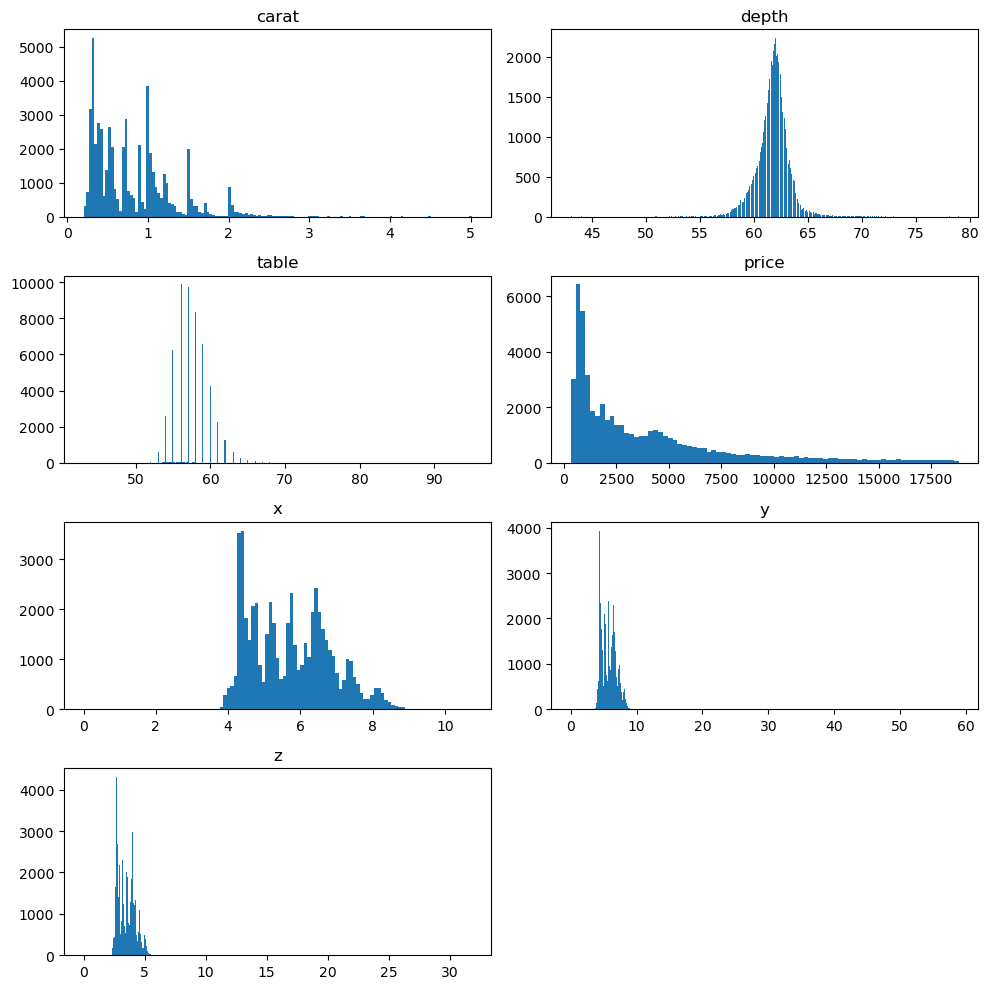

In [54]:
def find_hist_out(df):
    columns = df.select_dtypes(include=np.number).columns
    fig, ax = plt.subplots(4, 2, figsize=(10, 10))
    
    for i, col in enumerate(columns):
        row, col_num = divmod(i, 2)  # Determine row and column index for the subplot
        ax[row, col_num].hist(df[col], bins='auto')  # Plot histogram
        ax[row, col_num].set_title(col)  # Set title

    # Remove the empty subplot in the last row and last column
    fig.delaxes(ax[3, 1])
    fig.tight_layout()
    plt.show()

find_hist_out(df)

**Checking outliers using Boxplot**

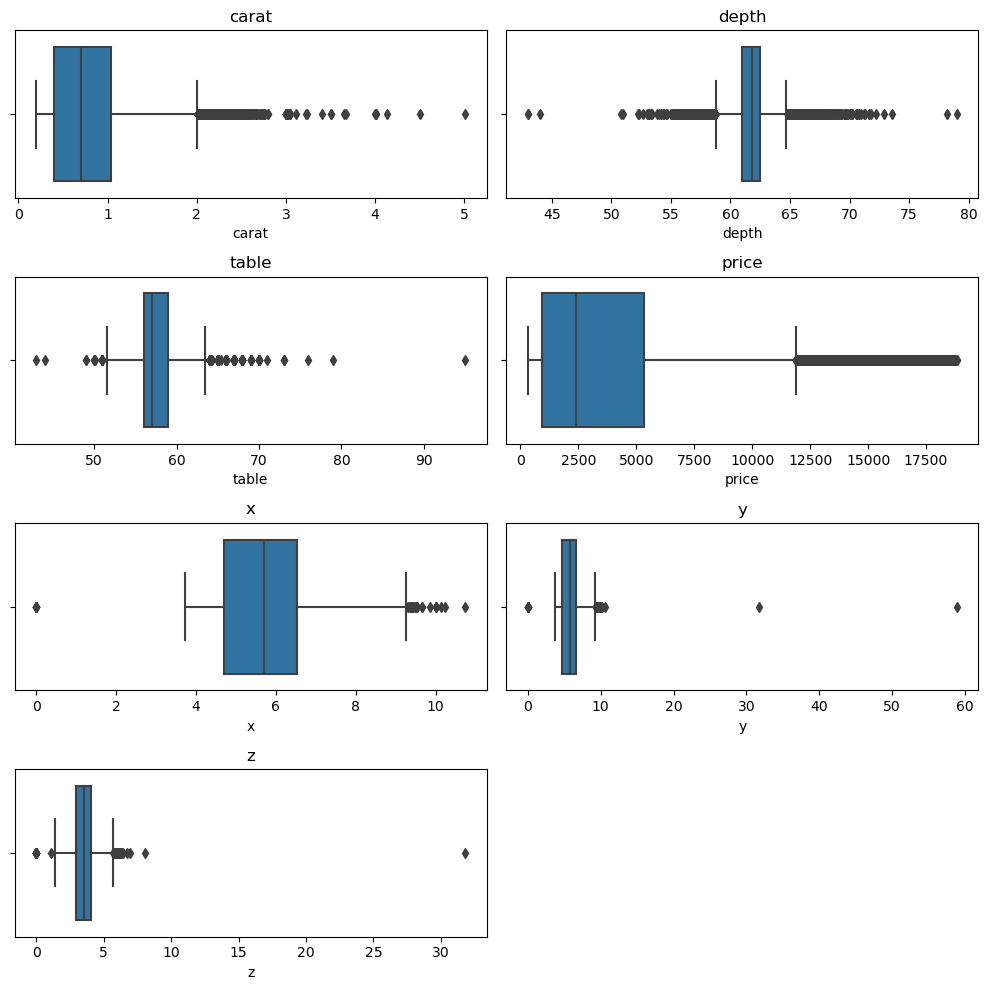

In [55]:
def find_box_out(df):
    columns = df.select_dtypes(include=np.number).columns
    fig, ax = plt.subplots(4, 2, figsize=(10, 10))
    
    for i, col in enumerate(columns):
        row, col_num = divmod(i, 2)  # Determine row and column index for the subplot
        sns.boxplot(x=df[col], ax=ax[row, col_num])  # Plot boxplot
        ax[row, col_num].set_title(col)  # Set title

    # Remove the empty subplot in the last row and last column
    fig.delaxes(ax[3, 1])
    fig.tight_layout()
    plt.show()

find_box_out(df)

**Checking outliers using Scatterplot**

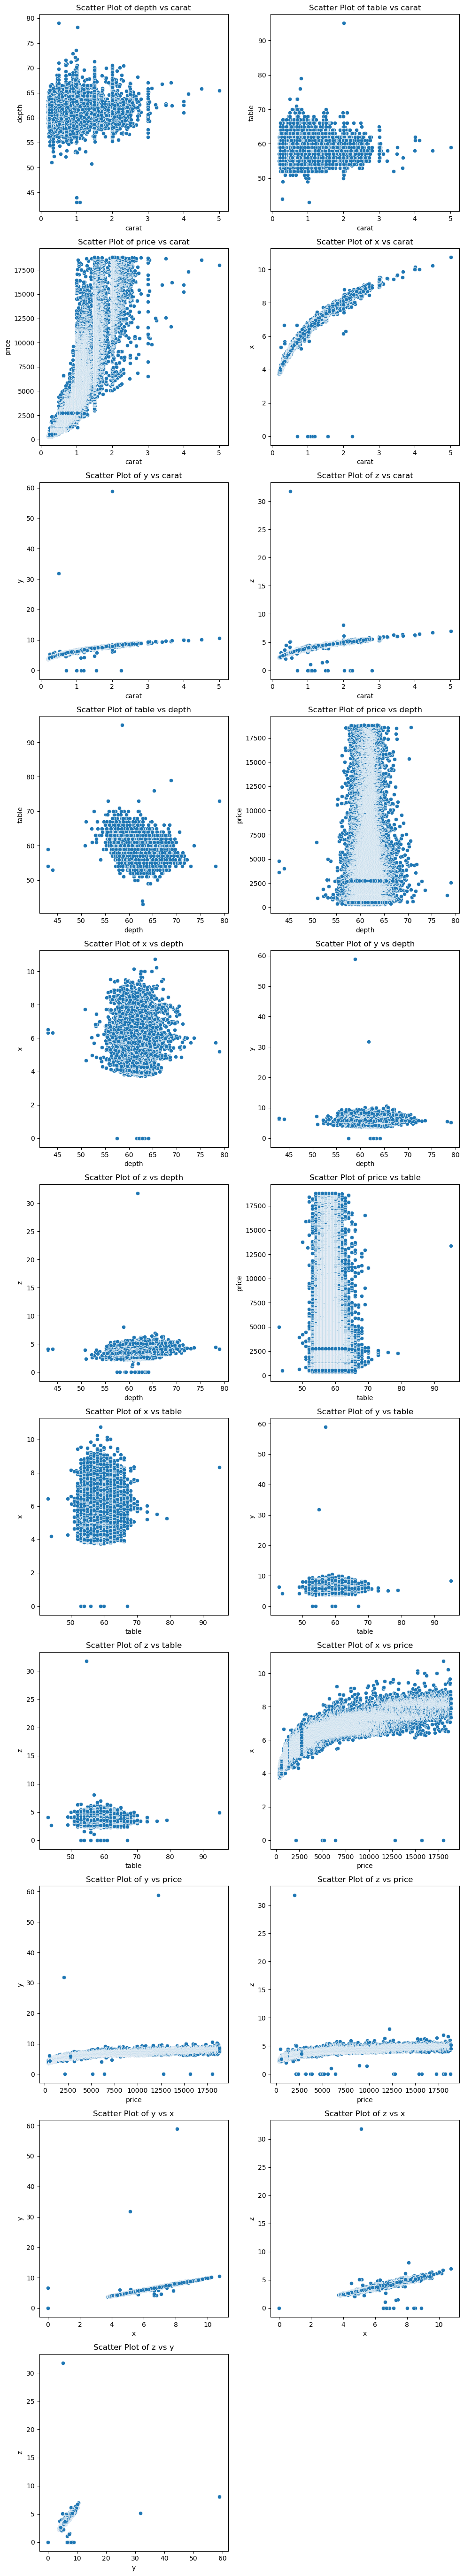

In [56]:

def find_scatter_out(df):
    # Select numeric columns
    numeric_columns = df.select_dtypes(include=np.number).columns
    combinations = list(itertools.combinations(numeric_columns, 2))  # Get all combinations
    
    num_plots = len(combinations)
    cols = 2  # Number of columns for the subplot grid
    rows = (num_plots + cols - 1) // cols  # Calculate rows needed for the subplot
    
    fig, ax = plt.subplots(rows, cols, figsize=(10, rows * 5))  # Adjust figsize for readability
    
    for i, (x, y) in enumerate(combinations):
        row, col_num = divmod(i, cols)  # Determine row and column index for the subplot
        
        # Create scatter plot
        sns.scatterplot(data=df, x=x, y=y, ax=ax[row, col_num])
        ax[row, col_num].set_title(f'Scatter Plot of {y} vs {x}')  # Set title
        ax[row, col_num].set_xlabel(x)  # Set x-axis label
        ax[row, col_num].set_ylabel(y)  # Set y-axis label
    
    # Remove empty subplots if any
    if num_plots % cols != 0:
        for j in range(num_plots, rows * cols):
            fig.delaxes(ax.flatten()[j])  # Remove empty axes
    
    plt.tight_layout()
    plt.show()

# Example usage
find_scatter_out(df)


**Checking outliers using statistical method(IQR)**

In [57]:
# Function to find outliers using IQR method for all numerical columns
def find_outliers_IQR(df):
    outliers = {}  # Dictionary to store outliers for each numerical column
    # Loop through each numerical column in the dataframe
    for col in df.select_dtypes(include=[np.number]):  
        q1 = df[col].quantile(0.25)  # Calculate the 1st quartile (25th percentile)
        q3 = df[col].quantile(0.75)  # Calculate the 3rd quartile (75th percentile)
        IQR = q3 - q1  # Calculate the Interquartile Range (IQR)
        L = q1 - 1.5 * IQR  # Lower bound for detecting outliers
        R = q3 + 1.5 * IQR  # Upper bound for detecting outliers

        # Find values in the column that are below L or above R (outliers)
        outliers_col = df[(df[col] < L) | (df[col] > R)][col]
        outliers[col] = outliers_col  # Store the outliers in the dictionary for this column

        # Print summary information for this column
        print(f"Column: {col}")  # Print the column name
        print(f"Number of outliers: {len(outliers_col)}")  # Print the number of outliers found
        print(f"Max outlier value: {outliers_col.max()}")  # Print the maximum outlier value
        print(f"Min outlier value: {outliers_col.min()}")  # Print the minimum outlier value
        print("\n")  # Add a new line for better readability
    
    return outliers  # Return the dictionary containing all the outliers for each column

# Call the function and store the result in a variable
outliers_IQR = find_outliers_IQR(df)

Column: carat
Number of outliers: 1873
Max outlier value: 5.01
Min outlier value: 2.01


Column: depth
Number of outliers: 2525
Max outlier value: 79.0
Min outlier value: 43.0


Column: table
Number of outliers: 604
Max outlier value: 95.0
Min outlier value: 43.0


Column: price
Number of outliers: 3523
Max outlier value: 18823
Min outlier value: 11897


Column: x
Number of outliers: 31
Max outlier value: 10.74
Min outlier value: 0.0


Column: y
Number of outliers: 28
Max outlier value: 58.9
Min outlier value: 0.0


Column: z
Number of outliers: 48
Max outlier value: 31.8
Min outlier value: 0.0




**Checking outliers using Z-score**

In [58]:


# Function to find outliers using Z-score method for all numerical columns
def find_outliers_zscore(df):
    outliers = {}  # Dictionary to store outliers for each numerical column
    # Loop through each numerical column in the dataframe
    for col in df.select_dtypes(include=[np.number]):  
        z_scores = stats.zscore(df[col])  # Calculate the Z-scores for the column
        
        # Find values where the Z-score is less than -3 or greater than 3 (outliers)
        outliers_col = df[(z_scores < -3) | (z_scores > 3)][col]
        outliers[col] = outliers_col  # Store the outliers in the dictionary for this column
        
        # Print summary information for this column
        print(f"Column: {col}")  # Print the column name
        print(f"Number of outliers: {len(outliers_col)}")  # Print the number of outliers found
        print(f"Max outlier value: {outliers_col.max()}")  # Print the maximum outlier value
        print(f"Min outlier value: {outliers_col.min()}")  # Print the minimum outlier value
        print("\n")  # Add a new line for better readability
    
    return outliers  # Return the dictionary containing all the outliers for each column

# Call the function and store the result in a variable
outliers_zscore = find_outliers_zscore(df)

Column: carat
Number of outliers: 432
Max outlier value: 5.01
Min outlier value: 2.22


Column: depth
Number of outliers: 681
Max outlier value: 79.0
Min outlier value: 43.0


Column: table
Number of outliers: 335
Max outlier value: 95.0
Min outlier value: 43.0


Column: price
Number of outliers: 1201
Max outlier value: 18823
Min outlier value: 15898


Column: x
Number of outliers: 42
Max outlier value: 10.74
Min outlier value: 0.0


Column: y
Number of outliers: 33
Max outlier value: 58.9
Min outlier value: 0.0


Column: z
Number of outliers: 52
Max outlier value: 31.8
Min outlier value: 0.0




Reason for value difference between IQR and Z-score is because data is not normally distributed so z-score is not suitable in this case.

**Working with outliers**

*1. Dropping the outliers*

Simply delete the rows containing outliers.

When to Use: When outliers are errors or do not represent valid data points.

In [77]:


def count_outliers_IQR(df):
    outlier_count = 0
    for column in df.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        # Count outliers
        outlier_condition = (df[column] < (q1 - 1.5 * IQR)) | (df[column] > (q3 + 1.5 * IQR))
        outlier_count += outlier_condition.sum()  # Count the number of True values
        
    return outlier_count


total_outliers = count_outliers_IQR(df)
print("Total number of outliers:", total_outliers)

Total number of outliers: 8632


In [75]:


def remove_outliers_IQR(df):
    # Create a copy of the DataFrame to avoid modifying the original one
    df_cleaned = df.copy()
    
    for column in df_cleaned.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        q1 = df_cleaned[column].quantile(0.25)
        q3 = df_cleaned[column].quantile(0.75)
        IQR = q3 - q1
        
        # Define the outlier condition
        outlier_condition = (df_cleaned[column] < (q1 - 1.5 * IQR)) | (df_cleaned[column] > (q3 + 1.5 * IQR))
        
        # Remove outliers
        df_cleaned = df_cleaned[~outlier_condition]  # Keep only non-outliers

    return df_cleaned.reset_index(drop=True)


df_no_outliers = remove_outliers_IQR(df_no_outliers)
print("DataFrame after removing outliers:")
print(df_no_outliers)

DataFrame after removing outliers:
       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
3       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
4       0.24  Very Good     J    VVS2   62.8   57.0    336  3.94  3.96  2.48
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
44206   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
44207   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
44208   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
44209   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
44210   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[44211 rows x 10 columns]


In [76]:


def count_outliers_IQR(df):
    outlier_count = 0
    for column in df.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        # Count outliers
        outlier_condition = (df[column] < (q1 - 1.5 * IQR)) | (df[column] > (q3 + 1.5 * IQR))
        outlier_count += outlier_condition.sum()  # Count the number of True values
        
    return outlier_count


total_outliers = count_outliers_IQR(df_no_outliers)
print("Total number of outliers:", total_outliers)

Total number of outliers: 0


*2. Capping or Winsorizing*

Replace outliers with the nearest non-outlier value (e.g., the 1st and 99th percentiles).

When to Use: When you want to retain the data but limit the impact of outliers.

In [78]:
def capping_out(df):
    # Capping outliers
    df_cleaned1 = df.copy()
    for column in df_cleaned1.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        lower_bound = df_cleaned1[column].quantile(0.01)
        upper_bound = df_cleaned1[column].quantile(0.99)
        df_cleaned1[column] = df_cleaned1[column].clip(lower=lower_bound, upper=upper_bound)
        
    return df_cleaned1

df_no_outliers1 = capping_out(df)
print("DataFrame after removing outliers:")
print(df_no_outliers1)

DataFrame after removing outliers:
       carat        cut color clarity  depth  table   price     x     y     z
0       0.24      Ideal     E     SI2   61.5   55.0   429.0  4.02  4.04  2.48
1       0.24    Premium     E     SI1   59.8   61.0   429.0  4.02  4.04  2.48
2       0.24       Good     E     VS1   57.9   64.0   429.0  4.05  4.07  2.48
3       0.29    Premium     I     VS2   62.4   58.0   429.0  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   429.0  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...     ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0  2757.0  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0  2757.0  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0  2757.0  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0  2757.0  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0  2757.0  5.83  5.87  3.64

[53794 rows x 10 columns]


In [79]:


def count_outliers_IQR(df):
    outlier_count = 0
    for column in df.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        # Count outliers
        outlier_condition = (df[column] < (q1 - 1.5 * IQR)) | (df[column] > (q3 + 1.5 * IQR))
        outlier_count += outlier_condition.sum()  # Count the number of True values
        
    return outlier_count


total_outliers = count_outliers_IQR(df_no_outliers1)
print("Total number of outliers:", total_outliers)

Total number of outliers: 8509


*3. Imputation*

Replace outlier values with a statistical measure (mean, median, mode).

When to Use: When you have a significant number of outliers and want to preserve data size.


In [80]:
def Imputation(df):
   
    df_cleaned2 = df.copy()
    for column in df_cleaned2.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        lower_bound = df_cleaned2[column].quantile(0.01)
        upper_bound = df_cleaned2[column].quantile(0.99)
        median_value = df_cleaned2[column].median()
        df_cleaned2.loc[(df_cleaned2[column] < lower_bound) | (df_cleaned2[column] > upper_bound), column] = median_value
        
    return df_cleaned2

df_no_outliers2 = Imputation(df)
print("DataFrame after removing outliers:")
print(df_no_outliers2)

DataFrame after removing outliers:
       carat        cut color clarity  depth  table  price     x     y     z
0       0.70      Ideal     E     SI2   61.5   55.0   2401  5.70  5.71  3.53
1       0.70    Premium     E     SI1   59.8   61.0   2401  5.70  5.71  3.53
2       0.70       Good     E     VS1   61.8   57.0   2401  4.05  4.07  3.53
3       0.29    Premium     I     VS2   62.4   58.0   2401  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0   2401  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53794 rows x 10 columns]


In [81]:
def count_outliers_IQR(df):
    outlier_count = 0
    for column in df.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        # Count outliers
        outlier_condition = (df[column] < (q1 - 1.5 * IQR)) | (df[column] > (q3 + 1.5 * IQR))
        outlier_count += outlier_condition.sum()  # Count the number of True values
        
    return outlier_count


total_outliers = count_outliers_IQR(df_no_outliers2)
print("Total number of outliers:", total_outliers)

Total number of outliers: 7159


*4. Transformation*

Apply transformations (e.g., logarithmic, square root) to reduce the effect of outliers.

When to Use: When you want to maintain all data points while minimizing the influence of outliers.

In [82]:
def Trans(df):
    
    df_cleaned3 = df.copy()
    for column in df_cleaned3.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        df_cleaned3[column] = np.log1p(df_cleaned3[column])
        
    return df_cleaned3

df_no_outliers3 = Trans(df)
print("DataFrame after removing outliers:")
print(df_no_outliers3)

DataFrame after removing outliers:
          carat        cut color clarity     depth     table     price  \
0      0.207014      Ideal     E     SI2  4.135167  4.025352  5.789960   
1      0.190620    Premium     E     SI1  4.107590  4.127134  5.789960   
2      0.207014       Good     E     VS1  4.058717  4.189655  5.793014   
3      0.254642    Premium     I     VS2  4.149464  4.077537  5.814131   
4      0.270027       Good     J     SI2  4.163560  4.077537  5.817111   
...         ...        ...   ...     ...       ...       ...       ...   
53935  0.542324      Ideal     D     SI1  4.123903  4.060443  7.922261   
53936  0.542324       Good     D     SI1  4.160444  4.025352  7.922261   
53937  0.530628  Very Good     D     SI1  4.155753  4.110874  7.922261   
53938  0.620576    Premium     H     SI2  4.127134  4.077537  7.922261   
53939  0.559616      Ideal     D     SI2  4.146304  4.025352  7.922261   

              x         y         z  
0      1.599388  1.605430  1.232560  


In [83]:
def count_outliers_IQR(df):
    outlier_count = 0
    for column in df.select_dtypes(include=['float64', 'int64']):  # only numeric columns
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        # Count outliers
        outlier_condition = (df[column] < (q1 - 1.5 * IQR)) | (df[column] > (q3 + 1.5 * IQR))
        outlier_count += outlier_condition.sum()  # Count the number of True values
        
    return outlier_count


total_outliers = count_outliers_IQR(df_no_outliers3)
print("Total number of outliers:", total_outliers)

Total number of outliers: 3381
